## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

## Read Dataset

In [2]:
names=['URL','Category']
df=pd.read_csv('../input/url-classification-dataset-dmoz/URL Classification.csv',names=names, na_filter=False)
df.shape

(1562978, 2)

## Check numbers of data for each class

In [3]:
df.Category.value_counts()

Arts          253840
Society       243943
Business      240177
Computers     117962
Science       110286
Recreation    106586
Sports        101328
Shopping       95270
Health         60097
Reference      58247
Games          56477
Kids           46182
Adult          35325
Home           28269
News            8989
Name: Category, dtype: int64

Text(0, 0.5, 'Total Number Of Individual Category')

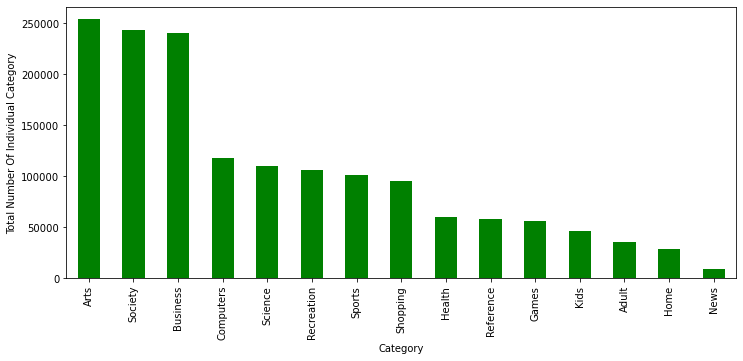

In [4]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

## Removing Data Imbalanced problem by Over Sampling[](http://)

In [5]:
class_1,class_2,class_3 ,class_4 ,class_5 ,class_6 ,class_7 ,class_8 ,class_9 ,class_10 ,class_11 ,class_12 ,class_13 ,class_14 ,class_15  = df.Category.value_counts()

In [6]:
df_class_1 = df[df['Category'] == "Arts"]
df_class_2 = df[df['Category'] == "Society"]
df_class_3 = df[df['Category'] == "Business"]
df_class_4 = df[df['Category'] == "Computers"]
df_class_5 = df[df['Category'] == "Science"]
df_class_6 = df[df['Category'] == "Recreation"]
df_class_7 = df[df['Category'] == "Sports"]
df_class_8 = df[df['Category'] == "Shopping"]
df_class_9 = df[df['Category'] == "Health"]
df_class_10 = df[df['Category'] == "Reference"]
df_class_11 = df[df['Category'] == "Games"]
df_class_12 = df[df['Category'] == "Kids"]
df_class_13 = df[df['Category'] == "Adult"]
df_class_14 = df[df['Category'] == "Home"]
df_class_15 = df[df['Category'] == "News"]

In [7]:
df_class_2_under = df_class_2.sample(class_1,replace=True)
df_class_3_under = df_class_3.sample(class_1,replace=True)
df_class_4_under = df_class_4.sample(class_1,replace=True)
df_class_5_under = df_class_5.sample(class_1,replace=True)
df_class_6_under = df_class_6.sample(class_1,replace=True)
df_class_7_under = df_class_7.sample(class_1,replace=True)
df_class_8_under = df_class_8.sample(class_1,replace=True)
df_class_9_under = df_class_9.sample(class_1,replace=True)
df_class_10_under = df_class_10.sample(class_1,replace=True)
df_class_11_under = df_class_11.sample(class_1,replace=True)
df_class_12_under = df_class_12.sample(class_1,replace=True)
df_class_13_under = df_class_13.sample(class_1,replace=True)
df_class_14_under = df_class_14.sample(class_1,replace=True)
df_class_15_under = df_class_15.sample(class_1,replace=True)
df = pd.concat([df_class_1,df_class_2_under,df_class_3_under,df_class_4_under,df_class_5_under,df_class_6_under,df_class_7_under,df_class_8_under,df_class_9_under,df_class_10_under,df_class_11_under,df_class_12_under,df_class_13_under,df_class_14_under, df_class_15_under], axis=0)

## Balanced Data

In [8]:
df.Category.value_counts()

Computers     253840
Reference     253840
Recreation    253840
Adult         253840
Shopping      253840
Sports        253840
Science       253840
Home          253840
Health        253840
Arts          253840
Society       253840
Business      253840
Kids          253840
Games         253840
News          253840
Name: Category, dtype: int64

In [9]:
df.shape

(3807600, 2)

## Balanced Data Visualization

Text(0, 0.5, 'Total Number Of Individual Category')

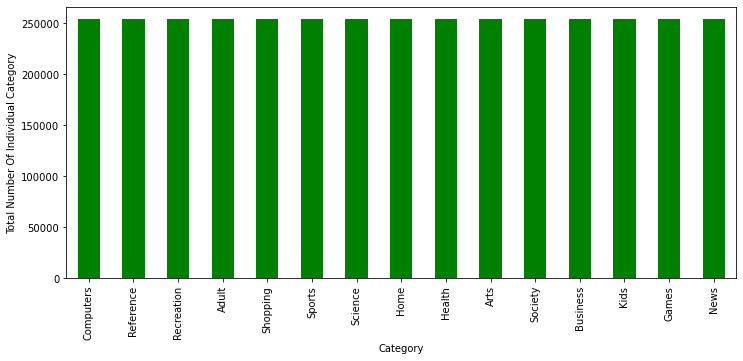

In [10]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

## Train Test Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Category'],test_size=0.05, random_state = 42)

In [12]:
X_test.shape

(190380,)

## Feature Engineering and Classifier

In [13]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

## Hyperparameters Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

## Prediction and Test Result

In [15]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8954963106272266, 0.8840476940855132, 0.8808813153794258, None)

In [16]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Adult       0.96      1.00      0.98     12441
        Arts       0.90      0.49      0.63     12810
    Business       0.95      0.67      0.78     12742
   Computers       0.92      0.91      0.91     12783
       Games       0.87      0.96      0.91     12783
      Health       0.97      0.97      0.97     12777
        Home       0.96      0.99      0.98     12695
        Kids       0.88      0.85      0.87     12737
        News       0.96      0.99      0.97     12775
  Recreation       0.84      0.91      0.87     12606
   Reference       0.89      0.94      0.91     12700
     Science       0.92      0.91      0.91     12607
    Shopping       0.62      0.97      0.75     12662
     Society       0.88      0.78      0.83     12613
      Sports       0.91      0.94      0.93     12649

    accuracy                           0.88    190380
   macro avg       0.90      0.88      0.88    190380
weighted avg       0.90   

In [17]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Adult     0.9617    0.9979    0.9794     12441
        Arts     0.9027    0.4859    0.6318     12810
    Business     0.9461    0.6686    0.7835     12742
   Computers     0.9232    0.9053    0.9142     12783
       Games     0.8736    0.9573    0.9135     12783
      Health     0.9650    0.9746    0.9698     12777
        Home     0.9642    0.9919    0.9779     12695
        Kids     0.8787    0.8522    0.8653     12737
        News     0.9560    0.9941    0.9747     12775
  Recreation     0.8434    0.9064    0.8738     12606
   Reference     0.8947    0.9354    0.9146     12700
     Science     0.9170    0.9058    0.9114     12607
    Shopping     0.6180    0.9691    0.7547     12662
     Society     0.8751    0.7821    0.8260     12613
      Sports     0.9121    0.9389    0.9253     12649

    accuracy                         0.8840    190380
   macro avg     0.8954    0.8844    0.8811    190380
weighted avg     0.8955   

## Confusion Matrix

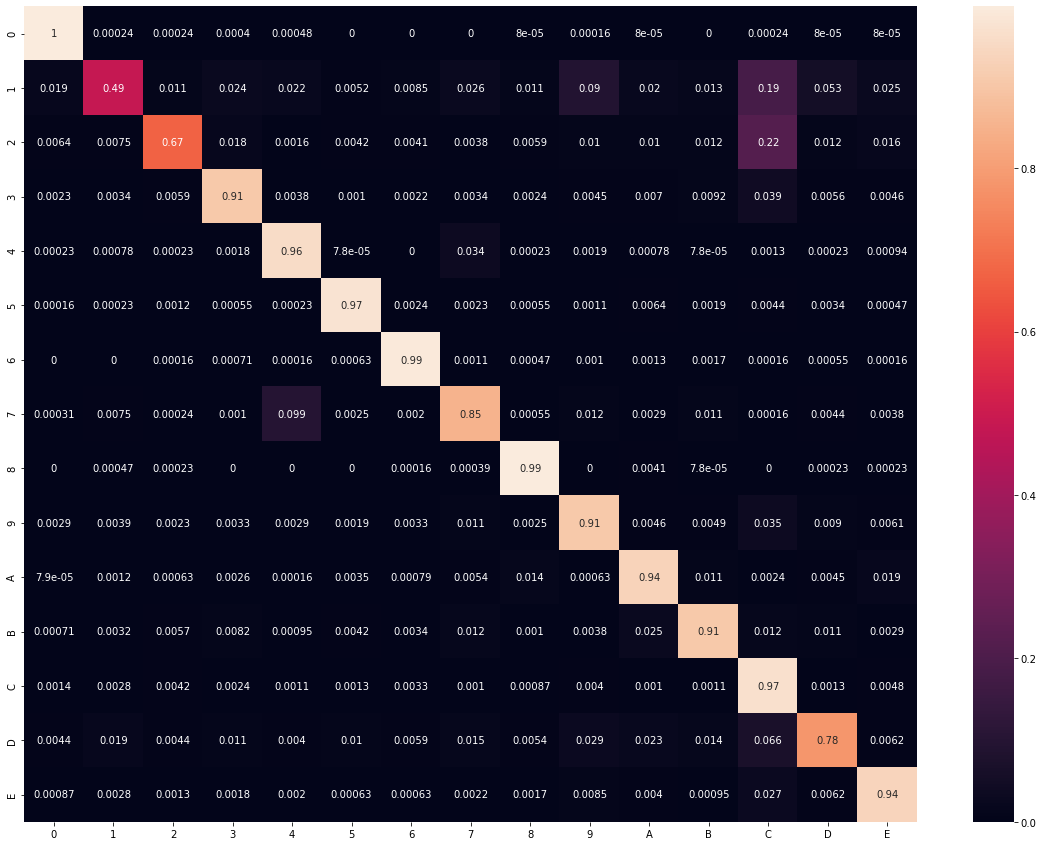

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

## Accuracy 

In [19]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9730190588352381
Naive Bayes Test Accuracy =  0.8840476940855132


## Real Time Test

In [20]:
print(gs_clf.predict(['http://www.business.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['Adult']
['Games']
